# Objective

**Day 26 of the [#30DayChartChallenge challenge](https://github.com/Z3tt/30DayChartChallenge_Collection2021/blob/main/README.md)**

**Topic: 26. trends**
    
Data used: https://research.csiro.au/slrwavescoast/sea-level/measurements-and-data/sea-level-data/

Source: https://www.comet.ml/site/estimating-uncertainty-in-machine-learning-models-part-1/

# Setup

In [75]:
import xarray as xr
import numpy as np
from numpy.random import randn, randint
#from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('ggplot')

# Read Data

In [76]:
filepath = '../../SL_Plots/Data/jb_iby_sry_gtn_giy.nc'
sl = xr.open_dataset(filepath)
# read variables
lats = sl.variables['lat'].values
lons = sl.variables['lon'].values
date = sl.variables['time'].values
height = sl.variables['height'].values # sea level height
gmsl = sl.variables['gmsl'].values # global mean sea level

# Prepare Data

In [77]:
# Linear Trend of monthly data
mean = np.mean(gmsl)
y_month= gmsl 
X_month = np.arange(0,len(date),1).reshape(-1, 1)

reg = LinearRegression().fit(X_month, y_month)
trend_month = reg.coef_
intercept_month = reg.intercept_
print(f"Linear yearly Trend: {trend_month}")

Linear yearly Trend: [0.29411608]


In [80]:
size = date.shape[0]
coefficients = []
intercepts = []

for _ in range(1000):
    idx = randint(0, size, size)
    x = X_month[idx].reshape(-1, 1)
    y = y_month[idx]
    
    model = LinearRegression().fit(x, y)
    
    coefficients.append(model.coef_.item())
    intercepts.append(model.intercept_)

In [97]:
upper_coefficient = np.percentile(coefficients, 97.5)
upper_intercept = np.percentile(intercepts, 97.5)

lower_coefficient = np.percentile(coefficients, 2.5)
lower_intercept = np.percentile(intercepts, 2.5)

upper = upper_coefficient*np.arange(len(date)) + upper_intercept
lower = lower_coefficient*np.arange(len(date)) + lower_intercept
print(f'upper coefficient: {upper_coefficient:.4f}, lower coefficient {lower_coefficient:.4f}')
print(f'upper intercept: {upper_intercept:.4f}, lower intercept {lower_intercept:.4f}')

upper coefficient: 0.2984, lower coefficient 0.2887
upper intercept: -47.3850, lower intercept -49.0179


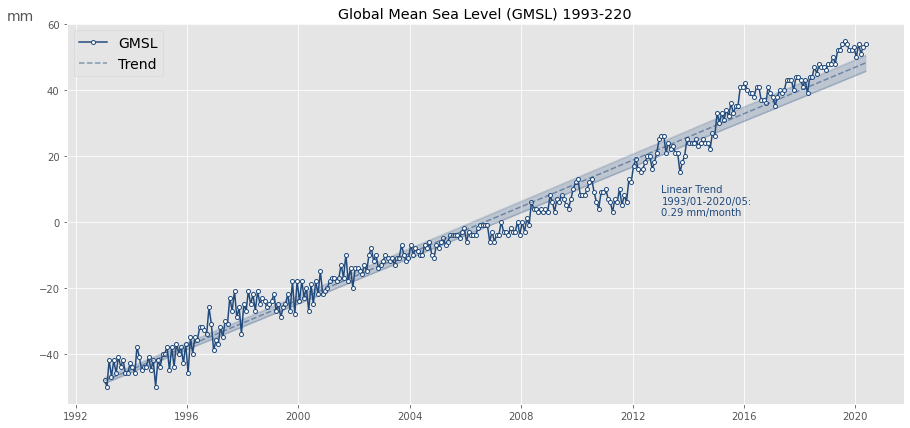

In [94]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
plt.plot(date, gmsl-np.mean(gmsl), color="#20497C", marker='o',
        markerfacecolor='white', markersize=4)
plt.plot(date, trend_month*np.arange(len(date)) + intercept_month, '--', color="#20497C", alpha=.5)
plt.plot(date, upper, '-', color="#20497C", alpha=.2)
plt.plot(date, lower, '-', color="#20497C", alpha=.2)
plt.fill_between(date, upper, lower, color="#20497C", alpha=.2)
ax.set_title("Global Mean Sea Level (GMSL) 1993-220")
ax.legend(labels=["GMSL", "Trend"],fontsize= 14, loc='upper left')
ax.text(x=date[240], y=2, s=f"Linear Trend\n1993/01-2020/05:\n{trend_month[0]:.2f} mm/month", color='#20497C')
ax.set_ylabel("mm", rotation=0, loc="top", fontsize=14)
plt.savefig("../plots/day26_trends.png");